# Triest Base

In [5]:
class Edge:
    def __init__(self, frm, to):#UNDIRECTED graph
        if frm < to:
            self.frm = frm # from
            self.to = to
        else:
            self.to = frm
            self.frm = to
    def __hash__(self):
        return hash((self.frm, self.to))
    def __eq__(self, other):
        return isinstance(self, type(other)) and other.frm == self.frm and self.to == other.to

edges = set()#[]

test_set = set()

with open("dataset.txt") as f:
    for line in f:
        if line[0] == "%":
            continue
        content = line.split()
        if content[0] != content[1]:# and Edge(content[0], content[1]) not in test_set:
            #edges += [Edge(content[0], content[1])]
            test_set.add(Edge(content[0], content[1]))
        
#check unique edges

In [6]:
print(len(edges))
print(Edge('1','2').__eq__(Edge('2','1')))
print(Edge('1','2').__hash__())
print(Edge('2','1').__hash__())

0
True
9007486980457191138
9007486980457191138


In [3]:
import random

class Triest_base:
    def __init__(self, set_limit=200):
        self.t = 0
        self.tau = 0
        self.edge_sampled = set()
        self.set_limit = set_limit #>=6
        self.counters = {}

    def sample(self, edge):
        if self.t<=self.set_limit:
            return True
        if random.random() <= (self.set_limit/self.t):
            remove_el = random.sample(self.edge_sampled, 1)[0]
            self.edge_sampled.remove(remove_el)
            self.update_counters('-', edge)
            return True
        return False

    def update_counters(self, op, edge):    
        s1 = set()
        s2 = set()
        for e in self.edge_sampled:
            if e.frm == edge.frm:
                s1.add(e.to)
            if e.to == edge.frm:
                s1.add(e.frm)
            if e.frm == edge.to:
                s2.add(e.to)
            if e.to == edge.to:
                s2.add(e.frm)
        for c in (s1 & s2):
            if op == '+':
                self.tau+=1
                self.counters[c] = self.counters.get(c, 0)+1
                self.counters[edge.frm] = self.counters.get(edge.frm, 0)+1
                self.counters[edge.to] = self.counters.get(edge.to, 0)+1

            elif op == '-':
                self.tau-=1
                self.counters[c] = self.counters.get(c, 0)-1
                if self.counters[c] <= 0:
                    del self.counters[c]
                self.counters[edge.frm] = self.counters.get(edge.frm, 0)-1
                if self.counters[edge.frm] <= 0:
                    del self.counters[edge.frm]
                self.counters[edge.to] = self.counters.get(edge.to, 0)-1
                if self.counters[edge.to] <= 0:
                    del self.counters[edge.to]
                    
    def run(self, stream_edges):
        for edge in stream_edges:
            if self.t % 1000 == 0:
                print("element ", self.t, "value: ", self.tau)
            self.t += 1
            if self.sample(edge):
                self.edge_sampled.add(edge)
                self.update_counters('+', edge)
        eps = (self.t*(self.t-1)*(self.t-2))/(self.set_limit*(self.set_limit-1)*(self.set_limit-2))
        if eps < 1:
            eps = 1
        return self.tau*eps

In [4]:
sample_size = 1000
t = Triest_base(sample_size)
exp = t.run(test_set)
t_val = Triest_base(len(test_set)).run(test_set)
print("With ", sample_size, "samples the expected value is ", exp," . The true value is ", t_val," . Error: ", abs(t_val - exp)," triangles")

element  0 value:  0
element  1000 value:  2
element  2000 value:  2
element  3000 value:  2
element  4000 value:  2
element  5000 value:  2
element  6000 value:  2
element  0 value:  0
element  1000 value:  2
element  2000 value:  9
element  3000 value:  46
element  4000 value:  139
element  5000 value:  301
element  6000 value:  505
With  1000 samples the expected value is  574.8879205137001  . The true value is  651.0  . Error:  76.11207948629988  triangles


# Plot number of triangles

element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  68
element  4000 value:  156
element  5000 value:  283
element  6000 value:  491
element  0 value:  0
element  1000 value:  6
element  2000 value:  10
element  3000 value:  10
element  4000 value:  10
element  5000 value:  10
element  6000 value:  10
element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  26
element  4000 value:  26
element  5000 value:  26
element  6000 value:  26
element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  43
element  4000 value:  43
element  5000 value:  43
element  6000 value:  43
element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  68
element  4000 value:  68
element  5000 value:  68
element  6000 value:  68
element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  68
element  4000 value:  156
element  5000 value:  156


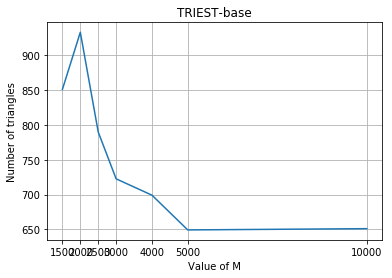

In [17]:
import matplotlib.pyplot as plt 
import time

%matplotlib inline

t_val = Triest_base(len(test_set)).run(test_set)

M = [1500,2000,2500,3000,4000,5000,10000]
exp2 = []
time_t = []

for sample_size in M:
    time1=time.clock()
    t = Triest_base(sample_size)
    exp = t.run(test_set)
    exp2.append(exp)

    time2=time.clock()
    time_t.append(time2-time1)



plt.title("TRIEST-base")
plt.plot(M, exp2)
plt.xlabel("Value of M")
plt.ylabel("Number of triangles")
plt.xticks(M)
plt.grid(True)
plt.show();

# Plot time

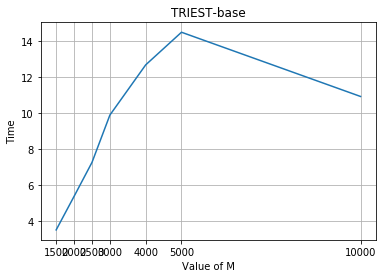

In [18]:
plt.title("TRIEST-base")
plt.plot(M, time_t)
plt.xlabel("Value of M")
plt.ylabel("Time")
plt.xticks(M)
plt.grid(True)
plt.show();

# Triest Improved

In [19]:
## TRIEST IMPR

import random

class Triest_impr:
    def __init__(self, set_limit=200):
        self.t = 0
        self.tau = 0
        self.edge_sampled = set()
        self.set_limit = set_limit #>=6
        self.counters = {}

    def sample(self, edge):
        if self.t<=self.set_limit:
            return True
        if random.random() <= (self.set_limit/self.t):
            remove_el = random.sample(self.edge_sampled, 1)[0]
            self.edge_sampled.remove(remove_el)
            return True
        return False

    def update_counters(self, t, edge):    
        s1 = set()
        s2 = set()
        for e in self.edge_sampled:
            if e.frm == edge.frm:
                s1.add(e.to)
            if e.to == edge.frm:
                s1.add(e.frm)
            if e.frm == edge.to:
                s2.add(e.to)
            if e.to == edge.to:
                s2.add(e.frm)
       
        weight_t = ((self.t-1)*(self.t-2))/(self.set_limit * (self.set_limit) )
        if weight_t < 1:
            weight_t = 1
        for c in (s1 & s2):
                self.tau+= weight_t
                self.counters[c] = self.counters.get(c, 0)+ weight_t
                self.counters[edge.frm] = self.counters.get(edge.frm, 0)+weight_t
                self.counters[edge.to] = self.counters.get(edge.to, 0)+weight_t
                    
    def run(self, stream_edges):
        for edge in stream_edges:
            
            if self.t % 1000 == 0:
                print("element ", self.t, "value: ", self.tau)
            self.t += 1
            self.update_counters(t, edge)
            if self.sample(edge):
                self.edge_sampled.add(edge)
                
        return self.tau

In [20]:
sample_size = 1000
t = Triest_impr(sample_size)
exp = t.run(test_set)
t_val = Triest_base(len(test_set)).run(test_set)
print("With ", sample_size, "samples the expected value is ", exp," . The true value is ", t_val," . Error: ", abs(t_val - exp)," triangles")

element  0 value:  0
element  1000 value:  6
element  2000 value:  28.668074000000004
element  3000 value:  48.886058000000006
element  4000 value:  164.12095399999998
element  5000 value:  327.48683399999993
element  6000 value:  563.66874
element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  68
element  4000 value:  156
element  5000 value:  283
element  6000 value:  491
With  1000 samples the expected value is  721.737694  . The true value is  651.0  . Error:  70.73769400000003  triangles


# Plot number of triangles

element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  68
element  4000 value:  156
element  5000 value:  283
element  6000 value:  491
element  0 value:  0
element  1000 value:  6
element  2000 value:  24.332779555555554
element  3000 value:  60.01806933333333
element  4000 value:  146.68648444444443
element  5000 value:  265.9883937777778
element  6000 value:  412.7236666666667
element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  63.65279649999999
element  4000 value:  181.04466500000007
element  5000 value:  323.0881410000001
element  6000 value:  561.9969305000001
element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  67.45602848000001
element  4000 value:  147.79058336000006
element  5000 value:  297.7162118400001
element  6000 value:  499.37810496000026
element  0 value:  0
element  1000 value:  6
element  2000 value:  26
element  3000 value:  68
element  4000 value:  

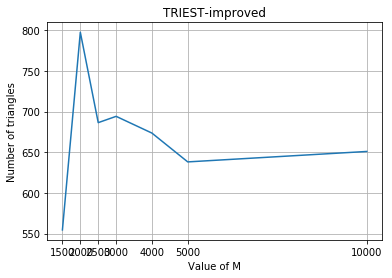

In [21]:
import matplotlib.pyplot as plt 
import time

%matplotlib inline

t_val = Triest_impr(len(test_set)).run(test_set)

M = [1500,2000,2500,3000,4000,5000,10000]
exp2 = []
time_t = []

for sample_size in M:
    time1=time.clock()
    t = Triest_impr(sample_size)
    exp = t.run(test_set)
    exp2.append(exp)

    time2=time.clock()
    time_t.append(time2-time1)



plt.title("TRIEST-improved")
plt.plot(M, exp2)
plt.xlabel("Value of M")
plt.ylabel("Number of triangles")
plt.xticks(M)
plt.grid(True)
plt.show();

# Plot time

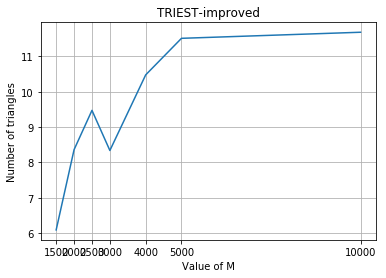

In [22]:
plt.title("TRIEST-improved")
plt.plot(M, time_t)
plt.xlabel("Value of M")
plt.ylabel("Number of triangles")
plt.xticks(M)
plt.grid(True)
plt.show();